# Chicago restaurants and food inspections
## Suggested aims
- Explore placement of restaurants within Chicago: What are differences between Mc Donald's, and Whole Foods, and Starbucks? (For me Starbucks was really surprising, as I thought it would be everywhere I'd go ...)
- Check food safety at Northwestern
- Investigate whether some restaurants (or locations) are more prone to fail food inspections.
- Investigate reasons for failed food inspections

## Aim of this notebook
- Provide basic strategies on exploring restaurants within Chicago 

## Suggested initial approaches (covered)
- pandas, filtering, computation of aggregate statistics
- python: lambda functions
- seaborn

## Suggested further approaches (not covered)
- pandas: text processing, merging, binning
- manual curation (or computational entity matching): correct spelling mistakes of restaurants
- scipy: non-parametric statistics

## Level
Intermediate

# Data background

The city of Chicago holds a great collection of public data at: data.cityofchicago.org

<b>Download Food Inspection data (~300MB)</b>: https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5  
<b>Recommended: download the .csv version</b>

# Analysis

## General settings

In [1]:
# point this to the folder, where you downloaded generifs_basics.gz
project_path = '~/Dropbox/data_science_tutorials/templates/restaurants_and_food_safety/project_path'

In [2]:
%matplotlib inline

import os
import pandas as pd

import matplotlib.pyplot as plt

## Data import and initial inspection

In [3]:
# complete the path to the food inspections; 
# Note that the name might needs to be changed, depending on the name chosen for your download
path_to_inspections = os.path.join(project_path, 'Food_inspections.csv')

In [4]:
# Import the food inspections. Note: I had downloaded the 'csv' version and thus use
# the 
df_inspections = pd.read_csv(path_to_inspections)

In [5]:
# Inspect the first entries
df_inspections.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2135602,NEW CHINA STATION,CHINA STATION,2506320.0,Restaurant,Risk 1 (High),2411 W NORTH AVE,CHICAGO,IL,60647.0,01/18/2018,Canvass Re-Inspection,Fail,"10. SEWAGE AND WASTE WATER DISPOSAL, NO BACK S...",41.910205,-87.687702,"(41.910205129391386, -87.68770229368916)"
1,2135592,MUGHAL INDIA INC,MUGHAL INDIA RESTAURANT,2119771.0,Restaurant,Risk 1 (High),560 W VAN BUREN ST,CHICAGO,IL,60607.0,01/18/2018,Canvass Re-Inspection,Pass,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.876850,-87.641985,"(41.876849676938306, -87.64198533328084)"
2,2135584,STONY ISLAND GROCERY,STONY ISLAND GROCERY,2565095.0,NaN,All,8301 S STONY ISLAND AVE,CHICAGO,IL,60617.0,01/18/2018,License,Not Ready,NaN,41.744160,-87.585228,"(41.74416023099397, -87.5852284872351)"
3,2135565,SUBWAY,SUBWAY,1904894.0,Restaurant,Risk 1 (High),1300 S WABASH AVE,CHICAGO,IL,60605.0,01/18/2018,Canvass Re-Inspection,Fail,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.865676,-87.625944,"(41.8656758723776, -87.625943531346)"
4,2135556,CONVENIENT FOOD MART,CONVENIENT FOOD MART,2074199.0,Grocery Store,Risk 3 (Low),2850 N SHERIDAN RD,CHICAGO,IL,60657.0,01/18/2018,Complaint Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.934271,-87.639488,"(41.93427051907201, -87.63948842747087)"


In [6]:
# inspect the column names to obtain an overview of distinct data saved in the table
df_inspections.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

# Investigate presence of restaurant

### Gain overview of data

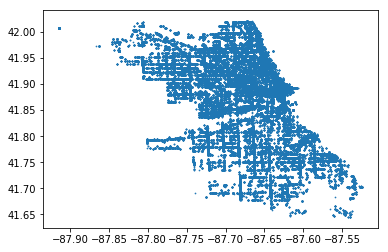

In [7]:
# Let's do a scatter plot
plt.scatter(
    df_inspections.loc[:, 'Longitude'],
    df_inspections.loc[:, 'Latitude'], 
    s=0.5)

### Inspect distribution of individual restaurant brands


In [8]:
# get overview of the restaurants with the most food inspections
df_inspections.loc[:, 'DBA Name'].value_counts().head(20)

SUBWAY                          2258
DUNKIN DONUTS                   1183
MCDONALD'S                       503
7-ELEVEN                         394
MCDONALDS                        290
CHIPOTLE MEXICAN GRILL           269
POTBELLY SANDWICH WORKS LLC      229
CORNER BAKERY CAFE               206
POTBELLY SANDWICH WORKS          196
DUNKIN DONUTS/BASKIN ROBBINS     184
DOMINO'S PIZZA                   180
SPORTSERVICE SOLDIER FIELD       176
WHOLE FOODS MARKET               172
FRESHII                          169
AU BON PAIN                      168
SUBWAY SANDWICHES                165
HAROLD'S CHICKEN SHACK           163
KFC                              156
Subway                           152
SEE THRU CHINESE KITCHEN         136
Name: DBA Name, dtype: int64

Now plot the occurence of MC DONALD'S

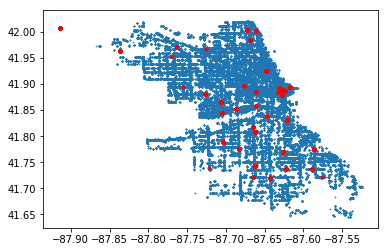

In [9]:
# plot background (all restaurants)
plt.scatter(
    df_inspections.loc[:, 'Longitude'],
    df_inspections.loc[:, 'Latitude'], 
    s=0.5)

# make filter for data of interest
is_restaurant_of_interest = df_inspections['DBA Name'] == "MCDONALD'S"   # use " hyphens so that ' can be used in name

# plot data of interest
plt.scatter(
    df_inspections.loc[is_restaurant_of_interest, 'Longitude'],
    df_inspections.loc[is_restaurant_of_interest, 'Latitude'], 
    s=10,
    c='red'
)

### Suggestion:
Try a few further restaurants, such as WHOLE FOODS MARKET or STARBUCKS or SUBWAY. Where are they?

## Investigate failure of food inspections

### Only consider food inspections that were either 'Pass' or 'Fail'

In [10]:
f = (df_inspections.loc[:, 'Results'] == 'Pass') | (df_inspections.loc[:, 'Results'] == 'Fail')
df_unambiguous = df_inspections.loc[f, :].copy()  # make copy, to preclude potential mistakes

### Do the restaurants and canteens of Northwestern fail food inspections more or less than other restaurants?

In [11]:
restaurant_of_interest = "NORTHWESTERN"

df_unambiguous.loc[:, 'has_passed'] = df_unambiguous.loc[:, 'Results'] == 'Pass'
df_unambiguous.loc[:, 'is_restaurant_of_interest'] = df_unambiguous.loc[:, 'DBA Name'].str.contains(
    restaurant_of_interest)

In [12]:
# # Let's see it the the given restaurant is more likely to fail food inspections
# # the error bars will indicate 95% confidence interval of bootstrapped samples
# # Note: to run the code, the # sign has to be removed
# sns.barplot(
#     x='is_restaurant_of_interest',
#     y='has_passed',
#     data=df_unambiguous
# )


# # Actually, as expected, the result is quite good.

In [13]:
# Yet, let's get the places with failed food inspetions
f = (df_unambiguous['is_restaurant_of_interest']) & (df_unambiguous['has_passed']==False)
failed_inspections = df_unambiguous.loc[f, :]

In [14]:
# # Where did tests fail? (Are failures distributed across Northwestern, or occur at one place?)
# # Note that # has to be removed to show content of variable.
# failed_inspections

In [15]:
# # inspect the violations of the first entry listed above
# # Note that # has to be removed to show content of variable.
# failed_inspections.iloc[0,:]['Violations'] 

### Relation between frequency of inspections and failure

In [16]:
df_inspections.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [17]:
# Explanation: line by line:

# From df_unambiguous (which only has tests with Pass or Fail)
# selet the columns [only select the license number, and the results] then group the data by
# the license number. And aggregate the data
# with a function that counts the total number of entries that are 'Pass'. Rename
# the columns of the results to avoid ambiguity later on

passed_inspections = df_unambiguous[
    ['License #', 'Results']].groupby(
    'License #').agg(
    lambda x: sum(x=='Pass')).rename(
        columns={'Results': 'passed'})

In [18]:
# Inspet data
passed_inspections.head()

,passed
License #,
0.0,240
1.0,1
2.0,10
9.0,8
40.0,11


In [19]:
# From df_unambiguous (which only has tests with Pass or Fail)
# selet the columns [only select the license number, and the results] then group the data by
# the license number. And count the number of elements (thus either pass or fail)
# convert the resulting data series to a tabular data frame, 
# and set the name to 'total' to avoid ambiguities later on

total_inspections = df_unambiguous[
    ['License #', 'Results']].groupby(
    'License #').size(
).to_frame(
    name='total')

In [20]:
# concatenate tables with the same index (License #)
# namely the the tables, passed_inspections and total_inspections
# along the column-axis
summary = pd.concat(        
    [passed_inspections, total_inspections], 
    axis=1)

In [21]:
summary.loc[:, 'fraction_passed'] = summary.loc[:, 'passed'] / summary.loc[:, 'total']

In [22]:
import numpy as np

In [23]:
import seaborn as sns

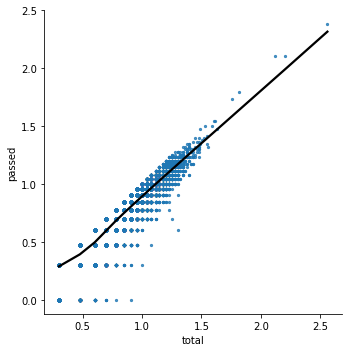

In [24]:
sns.lmplot(
    x='total', 
    y='passed', 
    data=summary.apply(lambda x: np.log10(x +1)),
    lowess=True,    # make a non-linear regression
    scatter_kws={'s': 5},
    line_kws={'color': 'k'}
)

It appears that the failure rate of food inspections is quite constant. Howeer there are some restaurants which pass less frequently than others.

# Possible further directions
- Inspect restaurants with low rate of passing inspections. 
- Inspect whether failure rate differs across the distinct areas or locations within Chicago?
- Do some text analysis to investigate the reaons for failure.
- Set up an automated script, which once a day goes to Chicago's data portal, and checks, if one of the restaurants of Northwestern has just passed or failed a food safety inspection, and would then write you an email about the results